# FIT5196 Task 2 in Assessment 1
#### Student Name: Vikram Hanumanthrao Patil
#### Student ID: 29389690

Date: 2/09/2018

Version: 1.0

Environment: Python 3.6.1 and Jupyter notebook

Libraries used: Main libraries used for assignment:
* re (for regular expression, included in Anaconda Python 3.6) 
* sys (to display system version, included in Anaconda Python 3.6) 
* nltk (for text processing, included in Anaconda Python 3.6) 
* pathlib (to set the document directory in order to read files, included in Anaconda Python 3.6) 
* nltk.tokenize (for tokenize and mwetokenize process, included in Anaconda Python 3.6) 
* os (for changing file directory, included in Anaconda Python 3.6) 
* nltk.util (for bigrams, included in Anaconda Python 3.6) 
* nltk.probability (for calculating term frequency of tokens, included in Anaconda Python 3.6) 
* warnings (to ignore any warnings thrown whiel execution, included in Anaconda Python 3.6) 
* nltk.probability (for calculating term frequency of tokens, included in Anaconda Python 3.6) 
* nltk.stem (for stemming of tokens, included in Anaconda Python 3.6) 
* pandas(for creating dataframes, included in Anaconda Python 3.6) 
* matplotlib(for plotting dataframes, included in Anaconda Python 3.6) 


## Introduction:

This analysis consists of parsing of 219/250 resumes, cleaning the resumes' files by removing stopwords, characters less than 3length, most frequent and less frequent words. 
Once the tokens are generated, bigrams and unigrams are merged to form final vocab list.
Then count of each tokens present in each resume is printed to files to form the vector matrix, which further helps for text processing.



##  Import libraries 

In [124]:
# Importing libraries for assessment 1 - Task 2

import re
import sys
import nltk
from pathlib import Path
from nltk.tokenize import RegexpTokenizer
import os
from nltk.util import ngrams
from nltk.probability import *
import warnings
warnings.filterwarnings('ignore')
from nltk.tokenize import MWETokenizer
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


#Printing system version
print (sys.version_info)

sys.version_info(major=3, minor=6, micro=1, releaselevel='final', serial=0)


### 1) Identify the 250 resumes file numbers assigned to me.   

In [125]:
#Function used to clean the data while reading the files

def clean_data_fun(data):
    data=re.sub('[^\s!-~]', '', data) #removes extra unwanted characters
    data = re.sub('[%s]' % re.escape("\n\|\/"), '', data)  # removes punctuations
    data = re.sub('\s+', ' ', data)# removes extra whitespace
    return data #returns cleaned data

In [126]:
#This step extracts the required 250 resumes' names assigned to me from the folder.

#From the directory fetch the resumes numbers assigned to me
os.chdir('C:/Users/vikra/Desktop/Python/wrangling/Assignment/A-1/Task2')
with open('student_dataset.txt','r') as input_file:
    resume_student_dataset=input_file.read()
input_file.close()

# Once the file is opened, read the file inorder to find the resume's file numbers

resume_student_dataset=clean_data_fun(resume_student_dataset) #clean the data set if any unwanted characters present
resume_student_dataset=resume_student_dataset.split(" ") #extract individual file string using str.split()
resume_student_dataset=list(set(resume_student_dataset)) #fetch unique file numbers by applying set.
print("Result :Total resumes to be extracted-",len(resume_student_dataset),"out of 250 resumes") #print result
resume_student_dataset.sort() #The final list which contains the 219 file numbers to be extracted.

print("\n",resume_student_dataset)

Result :Total resumes to be extracted- 219 out of 250 resumes

 ['1', '101', '102', '107', '108', '118', '119', '12', '120', '126', '128', '133', '135', '137', '14', '140', '142', '143', '145', '147', '150', '153', '156', '167', '169', '170', '173', '176', '177', '181', '186', '188', '19', '20', '207', '208', '227', '229', '231', '233', '243', '246', '252', '253', '257', '260', '262', '264', '271', '272', '275', '277', '278', '289', '290', '292', '297', '301', '303', '308', '314', '317', '32', '321', '324', '329', '335', '336', '340', '343', '344', '345', '347', '359', '365', '367', '371', '372', '381', '382', '385', '386', '39', '390', '395', '398', '405', '409', '410', '42', '421', '425', '429', '437', '439', '446', '448', '452', '459', '467', '472', '475', '477', '48', '492', '495', '496', '50', '500', '502', '503', '504', '508', '509', '51', '516', '517', '524', '525', '529', '535', '543', '545', '556', '563', '565', '569', '570', '572', '575', '579', '58', '580', '581', '583', '58

In [127]:
#Next step: from previous step I got the numbers, now mapping these numbers with the resume file number inside directory

path = "C:/Users/vikra/Desktop/Python/wrangling/Assignment/A-1/Task2/resumeTxt"

Files=list(sorted(os.listdir(path)))
print("Total files in the directory:",len(Files))

required_text_files=[] #To store only the required files. This will store 219 files' names out of 866
pattern =re.compile('(?<=resume_\()[0-9]+(?=\).txt)') #using regex, matching the files
for each in Files:
    for j in (pattern.findall(each)):
        if j in resume_student_dataset:
            required_text_files.append(each)
            
print("\nThe required file names are:",(required_text_files))


Total files in the directory: 866

The required file names are: ['resume_(1).txt', 'resume_(101).txt', 'resume_(102).txt', 'resume_(107).txt', 'resume_(108).txt', 'resume_(118).txt', 'resume_(119).txt', 'resume_(12).txt', 'resume_(120).txt', 'resume_(126).txt', 'resume_(128).txt', 'resume_(133).txt', 'resume_(135).txt', 'resume_(137).txt', 'resume_(14).txt', 'resume_(140).txt', 'resume_(142).txt', 'resume_(143).txt', 'resume_(145).txt', 'resume_(147).txt', 'resume_(150).txt', 'resume_(153).txt', 'resume_(156).txt', 'resume_(167).txt', 'resume_(169).txt', 'resume_(170).txt', 'resume_(173).txt', 'resume_(176).txt', 'resume_(177).txt', 'resume_(181).txt', 'resume_(186).txt', 'resume_(188).txt', 'resume_(19).txt', 'resume_(20).txt', 'resume_(207).txt', 'resume_(208).txt', 'resume_(227).txt', 'resume_(229).txt', 'resume_(231).txt', 'resume_(233).txt', 'resume_(243).txt', 'resume_(246).txt', 'resume_(252).txt', 'resume_(253).txt', 'resume_(257).txt', 'resume_(260).txt', 'resume_(262).txt', '

--------------
### 2) Read 219 resumes' data from the directory. Additionally, sentence segmentation and case normalization is done.

In [128]:
# Case normalization function, this function will lower case the first word of every sentence. 

def normalize_fun(data):
    new_list=''
    new_list=''.join(re.sub(r'(^\s?\w+)',lambda m: m.group().lower(),data)) # lower case the first word of sentence
    return new_list


In [129]:
# Read all 219 files and store in a dictionary format.

os.chdir('C:/Users/vikra/Desktop/Python/wrangling/Assignment/A-1/Task2/resumeTxt')

#This method opens and reads the file
def read_file_contents(file_name):
    with open(file_name,'r',encoding='UTF-8') as f:
        data = f.read()
    return data
    f.close()

# This step performs sentence segmentation and case normalization
def perform_seg_norm(data):
    new_str=''
    sent_tokenize_list = sent_tokenize(data)
    sent_tokenize_list=[normalize_fun(each) for each in sent_tokenize_list]
    new_str = ''.join(str(e) for e in sent_tokenize_list)
    return new_str


#Read all 219 texts, clean and store them
all_text=[read_file_contents(name) for name in required_text_files] #Read all 219 data into one list
all_text=[clean_data_fun(each) for each in all_text] #remove unwanted characters for each file

# Applying sentence segmentation + case normalization, the result is final 219 data stored in a list
final_data=[]
final_data+=[perform_seg_norm(each) for each in all_text]
    
final_all_text=''.join(each for each in final_data) #Convert whole 219 data into one string. This is required for further steps


#Storing all resumes and respective data into a dictionary format
resume_dict = dict(zip(resume_student_dataset, final_data))
#resume_dict

print("'final_data' contains normalised 219 resumes' data in a list format")
print("'final_all_text' is a string, which contains all 219 data in one file")

'final_data' contains normalised 219 resumes' data in a list format
'final_all_text' is a string, which contains all 219 data in one file


-----------
### 3) Perform tokenisation.            


In [130]:
#Below function tokenises based on the given regular expression.

def f_tokenise(data):
    tokenizer = RegexpTokenizer(r"\w+(?:[-']\w+)?")  # Regular expression used for tokenization
    tokens = tokenizer.tokenize(data)
    return tokens

tokenised_data=f_tokenise(final_all_text)
print("Total tokens present after reading all 219 resumes:",len(tokenised_data))


Total tokens present after reading all 219 resumes: 137702


------------
### 4) Removal of stop words from tokens

In [131]:
#Fetching stop_words from the directory

os.chdir('C://Users//vikra//Desktop//Python//wrangling//Assignment//A-1//Task2')

with open('stopwords_en.txt','r') as input_file:
    stop_words=input_file.read()
input_file.close()

stop_words=stop_words.split()
stop_words=set(stop_words) #this list contains the stop words given for the assessment.

#Filter stop words from tokens

stopped_stopwords=[w for w in tokenised_data if w not in stop_words]
print("Tokens filtered from stop words:",len(stopped_stopwords))


Tokens filtered from stop words: 105116


-----------------
### 5) Filtering tokens with less than 3 characters.

In [132]:
#Removes data with less than 3character

#A function which identifies and removes tokens with less than 3 characters
def filter_word(data):
    filter_list=[]
    for each in data:
        if len(each)>3:
            filter_list.append(each)
    return filter_list

#A function which identifies 3char
def find_3charword(data):
    filter_list=[]
    for each in data:
        if len(each)<3:
            filter_list.append(each)
    return filter_list

filtered_tokens=filter_word(stopped_stopwords) # calling the function to remove less than 3 characters 
tokens_3char=find_3charword(stopped_stopwords)

print("Tokens less than 3 character removed and new filtered tokens=",len(filtered_tokens))


Tokens less than 3 character removed and new filtered tokens= 91722


-----------------------------
### 6) Filtering context-dependent (with the threshold set to %98) and rare tokens (< than 2%)

####  This section finds the 98% and 2% tokens and removes them. Process is divided into 3 steps.
---------------------------------------------------------
#### 6-1: Function(count_tokens_sen) accepts the tokens and all the resume files data and returns the count of each tokens  presence against each file.

In [133]:
def count_tokens_sen(word_set,phrase_set):
    word_set=list(set(word_set))
    matches=[]
    for sen in phrase_set:
        words=sen.split()
        words=list(set(words))
        matches+=[x for x in word_set if x in words]
    
    counts={}
    for each in matches:
        if each in counts:counts[each] += 1
        else:counts[each] = 1
    return counts


tokens_count=count_tokens_sen(filtered_tokens,final_data) # stores the count of presence of each token in all files
# filtered_tokens contains the previous filtered tokens
# final_data here is the list which contains 219 resumes' data

#### Output of 6-1: The count of each token against presenece of 219 is calculated
---------------------------------------------------------------------------------
#### 6-2: This section finds the 98% and 2% tokens

In [134]:
# Defining a function which calculates the percentage of presenece of each token
def filter_contextdep(data):
    tokens_to_be_filtered=[]
    for key,value in data.items():
        value=round((value/219)*100,2)
        if value >= 98 or value <= 2:
            #print(key,value,"%")
            tokens_to_be_filtered.append(key)
    return tokens_to_be_filtered

tokens_to_be_filtered_contextdep=filter_contextdep(tokens_count)

#### Output of 6-2: calculates the tokens which are context dependent
--------------------------------------------------------------------
#### 6-3: Filter tokens which are context dependent

In [135]:
filt_tokens=[w for w in filtered_tokens if w not in tokens_to_be_filtered_contextdep]

#-------------------------------------------------------------------------------
print("Output of step-3: tokens greater than 98% and less than 2% are removed.")
#-------------------------------------------------------------------------------


print("\nTotal words to be removed which are occuring more than 98% or less than 2%=",len(tokens_to_be_filtered_contextdep))

print("\nFiltered tokens after removing context dependent=",len(filt_tokens))


Output of step-3: tokens greater than 98% and less than 2% are removed.

Total words to be removed which are occuring more than 98% or less than 2%= 10321

Filtered tokens after removing context dependent= 71962


--------------------------------------
### 7) Stemming process. Since stemmer works only for lower-case tokens, hence process is to filter the lowercase and apply stemming

#### 7-1: Finding all Uppercase and lowercase tokens

In [136]:
uppercase_pattern=re.compile(r'^[A-Z].*\b') # A Regex pattern to identify uppercase tokens
lowercase_pattern=re.compile(r'^[a-z].*\b') # A Regex pattern to identify lowercase tokens

uppercase_list=[]
lowercase_list=[]

for each in filt_tokens:
    uppercase_list+=uppercase_pattern.findall(each)

for each in filt_tokens:
    lowercase_list+=lowercase_pattern.findall(each)
    
print("Total upper case tokens:",len(uppercase_list))
print("Total lower case tokens:",len(lowercase_list))

Total upper case tokens: 27742
Total lower case tokens: 41260


#### 7-2: Stemming using the Porter stemmer for lower case tokens

In [137]:
stemmer = PorterStemmer()
#print(['{0} -> {1}'.format(w, stemmer.stem(w)) for w in lowercase_list])


lowercase_tokens = [stemmer.stem(word) for word in lowercase_list]
print("Stemmed lower-case tokens:",len(lowercase_tokens))

Stemmed lower-case tokens: 41260


#### 7-3: Combine both uppercase and stemmed lowercase to form the unigram

In [138]:
#combining lowercase and uppercase

final_unigram_tokens=list(lowercase_tokens+uppercase_list)
print("Total unigrams:",len(final_unigram_tokens))
#final_unigram_tokens

Total unigrams: 69002


----------------------------------
### 8) Finding Bigrams

#### From previous step(7-3), top 200 bigrams are calculated from final uni-grams

In [139]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
bigram_finder = nltk.collocations.BigramCollocationFinder.from_words(final_unigram_tokens)
bigram_finder.apply_freq_filter(1)
bigram_finder.apply_word_filter(lambda w: len(w) < 3)# or w.lower() in ignored_words)
top_200_bigrams = bigram_finder.nbest(bigram_measures.pmi, 200) # Top-200 bigrams
#top_200_bigrams

------------------------
### 9) Re-tokenization using MWETokenizer.

#### 9-1) Combine unigrams and bi-grams and make one vocab

In [140]:
mwe_tokenizer = MWETokenizer(top_200_bigrams)
mwe_tokens = mwe_tokenizer.tokenize(final_unigram_tokens)
mwe_tokens.sort()
mwe_tokens=set(mwe_tokens)
len(mwe_tokens)
#mwe_tokens contains the final tokens(unigrams and bi-grams)

3472

#### 9-2) Convert mwe tokens to formated list

In [141]:
#This step is required to search the bi-grams in resume data set.
#Convert mwe tokens to formated list

new_list=[]
for each in mwe_tokens:
    if re.match(".*\w+_\w+",each):
        new_list.append(re.sub(r'_',' ',each))
    else:
        new_list.append(each)

#### 9-3) From the filtered tokens,checking for any context-dependent words and filtering them.

In [148]:
#From the filtered tokens,checking for any context-dependent words and filtering them.

tokens_tobefilt=count_tokens_sen(new_list,final_data) #from the tokens finding the count of presence in each resume file.
tokens_tobefilt=filter_contextdep(tokens_tobefilt) #finding the 98% and 2% tokens.
final_vocab=[w for w in new_list if w not in tokens_tobefilt] #  cleaned tokens
final_vocab=[w for w in final_vocab if w not in stop_words]#removing any stopwords if present
final_vocab=filter_word(final_vocab) # removing any 3charc tokens
final_vocab.sort()
print("Final vocab:",len(final_vocab))


Final vocab: 3296


#### 9-4) Creating a final vocab index dictionary, which is output to file

In [151]:
# storing final vocab with dictionary with index
final_vocab_dict=dict(enumerate(final_vocab))
#print(final_vocab_dict)

--------------------------------------
### 10) Clean individual resume files and find the ocunt of each token in resume files

#### 10-1) This step is required to clean indivual resume files, in order to capture the count of tokens in each file

In [152]:
#The purpose of this step is to clean individual resume from stopwords, context dependent, context independent 
#and less than 3 characters length

#Update the stop words with tokens with context dependent and tokens with less than 3 characters.
stop_words.update(tokens_to_be_filtered_contextdep+tokens_tobefilt+tokens_3char)

#Fucntion to remove stop words
def final_clean(data):
    new_list=[]
    new_list+=[w for w in data if w not in stop_words]
    return new_list

#Access each resume and clean them.
final_cleaned_data=[]
for each in final_data:
    new_str=''
    token=f_tokenise(each)
    new_str=final_clean(token)
    final_cleaned_data.append(' '.join(new_str))

print("'final_cleaned_data' contains a list of cleaned individual resumes")

'final_cleaned_data' contains a list of cleaned individual resumes


#### 10-2) Find the count of each tokens in each resume files

In [153]:
#Next find the count of each tokens in each resume files

#This function tokenises and calculates the count of each token appearing in the resume file
def word_count(data):
    counts = dict()
    words = f_tokenise(data)

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

count_data_tokens=[]
for each_sen in final_cleaned_data:
    count_data_tokens.append(word_count(each_sen))

print("'count_data_tokens' contains count of each token for each resume file")

'count_data_tokens' contains count of each token for each resume file


#### 10-3) Now map the count of each token with the index of the final_vocab, which is the desired output

Here, 'resume_final_dict' contains the output in the format= token_index:count

In [154]:
final_dict=[]
for each_tokenised_file in count_data_tokens:
    new_dict = dict((k, each_tokenised_file.get(v)) for k, v in final_vocab_dict.items())
    new_dict={k:v for k,v in new_dict.items() if v is not None}
    final_dict.append(new_dict)
    
resume_final_dict = dict(zip(resume_student_dataset, final_dict))


-----------------
### 11) Writing final vocab to a file

#### 11-1) Printing final vocab to a text file

In [155]:
import json 

with open('29389690_vocab.txt','w') as output_file:
    output_file.write("Vocab of Unigrams & Bigrams:\n") 
    output_file.write(json.dumps(final_vocab_dict))
output_file.close()

#### 11-2) Printing count vector to a text file

In [156]:
with open('29389690_countVec.txt','w') as output_file:
    output_file.write("Count Vector:\n\n")  
    for k, v in resume_final_dict.items():
        output_file.write('resume_'+str(k) + ','+ str(v).replace("{","").replace("}", "") + '\n\n')
output_file.close()


### 12) References

10-2) word_count referred from this link https://www.w3resource.com/python-exercises/string/python-data-type-string-exercise-12.php

### 13) Summary

#### Logic used for assessment:

Section 1) Identify the 250 resumes file numbers assigned to me.   
   ##### Result: Out of 250, 219 were unqiue file numbers.                        
--------------
Section 2) Then out of total resumes(867) available, read only the 219 resumes' data from the directory. Additionally, sentence segmentation and case normalization is done.    
   ##### Result: Out of 250, 219 were read, all sentences were segmented and case normalization was performed.                        
----------
Section 3) Perform tokenisation. 
   ##### Result: Total tokens present after reading all 219 resumes: 137702                       
--------
Section 4) Tokens filtering from stop words.            
   ##### Result: Tokens filtered from stop words: 105116                        
-------------
Section 5) Filtering tokens with less than 3 characters.                                     
   ##### Result: Tokens less than 3 character removed and new filtered tokens= 91722                    
-----------
Section 6) Filtering context-dependent (with the threshold set to %98) and rare tokens (less than 2%).                   
   ##### Result: Filtered tokens after removing context dependent= 71962                       
-------------
Section 7) Stemming process only for lower-case tokens.                   
   ##### Result: After stemming, combining of uppercase and lowercase tokens, we get total tokens: 69002.                        
-------------
Section 8) Finding Bi-grams.                        
   ##### Result: Top 200 bi-grams is found.                        
-----------
Section 9) Re-tokenization using MWETokenizer.                    
   ##### Result: Using mwe tokeniser, bi-grams and unigrams are mixed and final vocab: 3296 is found.            
--------------
Section 10) Calculating the term frequency and creating a vector for desired output.                      
   ##### Result: For each resume, count of each token is calculated.                        
---------------
Section 11) Writing output to files.
   ##### Result: Result is printed in two files

--------
#### The wrangling process illustrated above, shows how a text starting with bellow statistics, ended up reduced to more sparse text while conserving the main text feature.

######################### Text Statistics Before Wrangling ##################################

Total number of vocabs: 137702


######################### Final Text Statistics After Wranling ##################################

Total number of vocabs: 3296


### Creating Dataframe and plotting the values

In [157]:
df= pd.DataFrame({"count":[137702,105116,91722,71962,69002,3296]},
                index=['Total tokens present after reading all 219 resumes','Tokens filtered from stop words','Tokens less than 3 character','Tokens removed context dependent','Count of tokens post stemming','Final vocab count post mwe tokenise'])

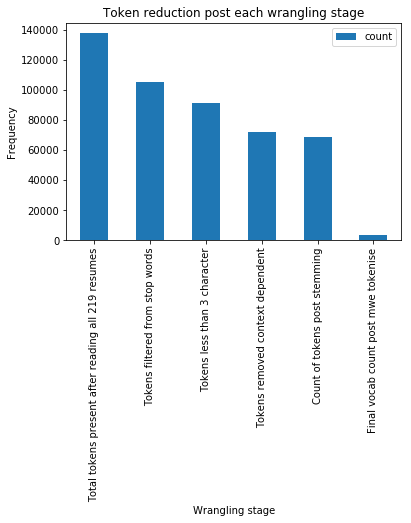

In [158]:
df.plot.bar()
plt.xlabel('Wrangling stage')
plt.ylabel("Frequency")
plt.title("Token reduction post each wrangling stage")
plt.show()